In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import ternary # ternary plot has a bug
import plotly.express as px
import h5py
import matplotlib as mpl

# import geopandas as gpd
import math

from matplotlib.patches import Circle, Wedge, Polygon

import os
import matplotlib.patheffects as path_effects


from netCDF4 import Dataset as NetCDFFile 

# for beachball - there are some error with using obspy
from pyrocko.plot import beachball
from pyrocko import moment_tensor as ptm

import cartopy.crs as ccrs
import cartopy.mpl.geoaxes

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from pathlib import Path
%matplotlib inline

import harmonica as hm

from obspy.core import UTCDateTime

from datetime import datetime, timezone

import seaborn as sns
sns.set()
sns.set_style(style='white') 
sns.set_style("ticks", {"xtick.major.size": 0.5, "ytick.major.size": 0.5})

In [2]:
data = pd.read_csv("/Users/mohd0001/PhD_Monash/Paper2/time-series/data/SUeq_data.csv", header = 'infer')
# data = data[(data['DATE'] > '26-12-1994')]
# data = pd.read_csv('sum_with_2005_eqs.csv', header = 'infer')

data.sort_values(by = 'MW', ascending = False, inplace = True)

data['DATE'] = pd.to_datetime(data['DATE']) # change dtype to datetime format
data['DATE'] = data['DATE'].dt.strftime('%Y-%m-%d') # change dtype to object

# data['DATE'] and data['TIME'] should be object (str) to perform + operator

data_dummy = np.array(data['DATE'] + ' ' + data['TIME'])

data_ev_time = []

for val in data_dummy:
    data_ev_time.append(UTCDateTime(val))

    
ref_date = data_ev_time[0]

data_ev_time = np.array(data_ev_time)

date = []

for val in data_ev_time:
    date.append(val - ref_date)
    
date = np.array(date) # this is in seconds

data['YEARS'] = date/31536000

data = data.sort_values(by ='YEARS', ascending=True) # this is an important step

In [3]:
df = data[(data['P(km)'] > 0) &
          (data['DEPTH'] > 0) &
          (data['YEARS'] > -25) &
         (data['CLASS'] == 'UPPER')]

In [4]:
# In Andaman region 6˚N-15˚N

# data_sum = df[(df['LAT'] > -6) & (df['LAT'] < 6)] # Sumatra regim
data_sum = df[(df['LON'] > 105) & (df['LON'] < 116)] #Java

data_sum_T = data_sum[(data_sum['MRR'] > 0)]
# data_sum_T = data_sum_T[(data_sum_T['TYPE'] == 'THRUST') | (data_sum_T['TYPE'] == 'O_THRUST')]

data_sum_N = data_sum[(data_sum['MRR'] < 0)]
# data_sum_N = data_sum_N[(data_sum_N['TYPE'] == 'NORM')]

andamanMrrT_exp = np.asarray(data_sum_T['EX'])
andamanMrrT_mo = np.asarray(data_sum_T['MRR'])
andamanMrrT_time = np.asarray(data_sum_T['YEARS'])
andamanMrrT_energy = andamanMrrT_mo*np.power(10., andamanMrrT_exp)
# andamanMrrT_energy_mean = np.average(andamanMrrT_energy, )
andamanMrrT_energy_cum = np.cumsum(andamanMrrT_energy)

andamanMrrN_exp = np.asarray(data_sum_N['EX'])
andamanMrrN_mo = np.asarray(data_sum_N['MRR'])
andamanMrrN_time = np.asarray(data_sum_N['YEARS'])
andamanMrrN_energy = andamanMrrN_mo*np.power(10., andamanMrrN_exp)
andamanMrrN_energy_cum = np.cumsum(andamanMrrN_energy)

### Mo ###
andamanMoT_exp = np.asarray(data_sum_T['EX'])
andamanMoT_mo = np.asarray(data_sum_T['MO'])
andamanMoT_time = np.asarray(data_sum_T['YEARS'])
andamanMoT_energy = andamanMoT_mo*np.power(10., andamanMoT_exp)
andamanMoT_energy_cum = np.cumsum(andamanMoT_energy)

andamanMoN_exp = np.asarray(data_sum_N['EX'])
andamanMoN_mo = np.asarray(data_sum_N['MO'])
andamanMoN_time = np.asarray(data_sum_N['YEARS'])
andamanMoN_energy = andamanMoN_mo*np.power(10., andamanMoN_exp)
andamanMoN_energy_cum = np.cumsum(andamanMoN_energy)

# andamanMoS_exp = np.asarray(data_sum_S['EX'])
# andamanMoS_mo = np.asarray(data_sum_S['MO'])
# andamanMoS_time = np.asarray(data_sum_S['YEARS'])
# andamanMoS_energy = andamanMoS_mo*np.power(10., andamanMoS_exp)
# andamanMoS_energy_cum = np.cumsum(andamanMoS_energy)

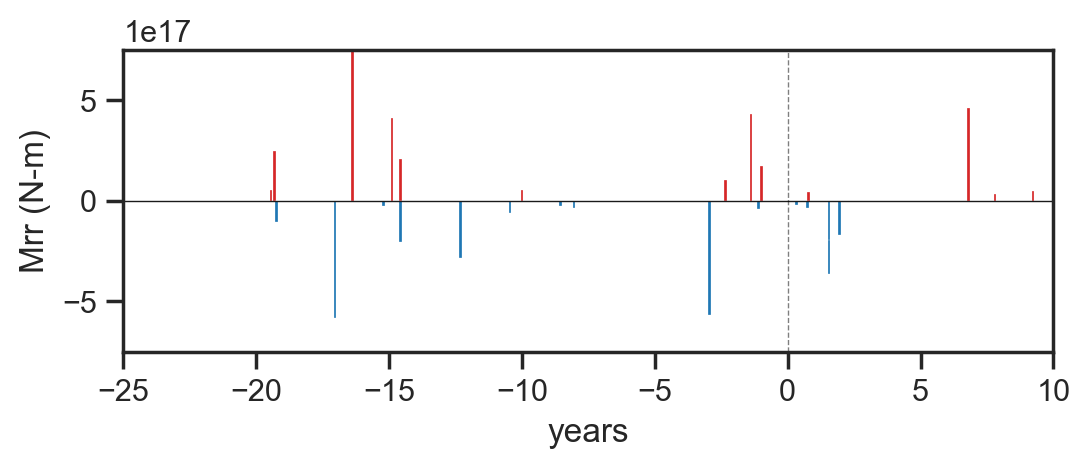

In [5]:
figsize = (6,2)
dpi=200

fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= True)

xlimit = [-25, 10]
ylimit = [-0.75e18, 0.75e18]


fig1=ax

fig1.bar(andamanMrrT_time, andamanMrrT_energy,
        linewidth = 0.1, color = 'tab:red', width = 0.1, alpha = 1, label = 'Compression')
# fig1.plot(andamanMrrT_time, andamanMrrT_energy, 'o',
#          markersize = 4, color = 'tab:red', label = 'Upper Plate Compression', markerfacecolor = 'white')

fig1.bar(andamanMrrN_time, andamanMrrN_energy,
        linewidth = 0.1, color = 'tab:blue', width = 0.1, alpha = 1, label = 'Extension')
# fig1.plot(andamanMrrN_time, andamanMrrN_energy, 'o',
#          markersize = 4, color = 'tab:blue', label = 'Upper Plate Extension', markerfacecolor = 'white')


fig1.axhline(y = 0, color = 'k', linestyle = '-', linewidth = 0.5)
fig1.axvline(color="black", lw=0.5, ls='--', alpha=0.5)

fig1.set_xlim(xlimit)
fig1.set_ylim(ylimit)

# fig1.set_yscale('log')

fig1.set_ylabel(r'Mrr (N-m)')
fig1.set_xlabel(r'years')

# fig1.legend(loc='lower right',
#             fontsize=7,
#             facecolor="white",
#             edgecolor="black",
#             framealpha=1,
#             markerscale=0.1)

# x0, xmax = fig1.set_xlim()
# y0, ymax = fig1.set_ylim()
# data_width = xmax - x0
# data_height = ymax - y0
# fig1.text(x0 + data_width*0.01, y0 + data_height * 0.9, '(b)')
# fig1.text(x0 + data_width*0.01, y0 + data_height * 0.9, 'Intermediate Depth (70-300 km)')

plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/Mrr_Javaupperplate.png",
            dpi = 300, transparent= True, bbox_inches='tight')

/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


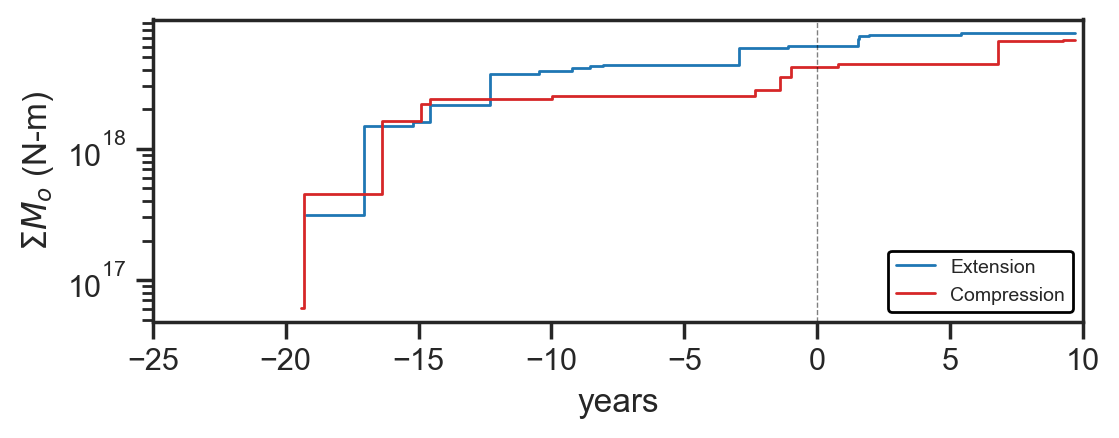

In [6]:
width = 1
xlimit = [-25, 10]
# ylimit = [0e18, 5.5e18]

fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= True)

#######################################################
fig1=ax

#############
## the x value for normal events
new_t = []
for i, s in enumerate(andamanMoN_time):
    new_t.append(s)
    if i != 0:
        new_t.append(s)
    
# the y value
new_y = []
for i, s in enumerate(andamanMoN_energy_cum):
    if i != 0:
        new_y.append(andamanMoN_energy_cum[i-1])
        new_y.append(s)
    else:
        new_y.append(s)
last_t = new_t[-1] #### This is because we need to extend the data for a horizontal line

fig1.plot(new_t, new_y, '-', markersize = 7, linewidth=1, color = 'tab:blue', alpha=1, label='Extension',
         mfc = 'blue', mew = 0.8, lw = 0.8)

## the x value for thrust events
new_t = []
for i, s in enumerate(andamanMoT_time):
    new_t.append(s)
    if i != 0:
        new_t.append(s)
    
# the y value
new_y = []
for i, s in enumerate(andamanMoT_energy_cum):
    if i != 0:
        new_y.append(andamanMoT_energy_cum[i-1])
        new_y.append(s)
    else:
        new_y.append(s)
        
last_y = new_y[-1] #### These 3 lines of code are because we need to extend the data for a horizontal line
new_t.append(last_t)
new_y.append(last_y)    
        
fig1.plot(new_t, new_y, '-', markersize = 7, linewidth=1, color = 'tab:red', alpha=1, label='Compression',
         mfc = 'red', mew = 0.8, lw = 0.8)


# fig2.axhline(y = 0, color = 'k', linestyle = '-', linewidth = 0.5)
fig1.axvline(color="black", lw=0.5, ls='--', alpha=0.5)
# axvline(color="black", label='2004 Mainshock', lw=0.5, ls='--', alpha=0.5)

fig1.set_ylabel(r'$\Sigma M_o$ (N-m)')
fig1.set_xlabel(r'years')


fig1.set_xlim(xlimit)
# fig1.set_ylim(1e18, 5e19)
# fig1.set_ylim(ylimit)

fig1.set_yscale('log')

fig1.legend(loc='lower right',
            fontsize=7,
            facecolor="white",
            edgecolor="black",
            framealpha=1,
            markerscale=0.1)


# x0, xmax = fig1.set_xlim()
# y0, ymax = fig1.set_ylim()
# data_width = xmax - x0
# data_height = ymax - y0
# fig1.text(x0 + data_width*0.01, y0 + data_height * 0.4, '(a)')
# # fig1.text(x0 + data_width*0.06, y0 + data_height * 0.85, 'Andaman (15˚N-6˚N)')

plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/EMo_Javaupperplate.png",
            dpi = 300, transparent= True, bbox_inches='tight')